In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
Fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = Fashion_mnist.load_data()

In [4]:
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


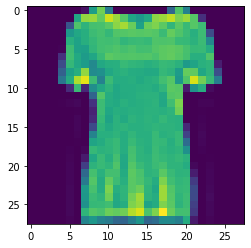

In [5]:
plt.imshow(X_train_full[10])

In [6]:
class_names=["T-shir/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### Reshape data
because the input consist of three dimension (another one for channel layer)

In [7]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

### Data Normalization
We normalize the data dimensions so that theyare approximatively the same scale

One way to do that to our data is to divise our data by 255 --> data between 0 and 1

NB: La technique la plus utilisée consiste à retrancher la moyenne ensuite diviser par l'écart type

In [8]:
X_train_n=X_train_full/255.  # 255. pour éviter les divisions entières
X_test_n=X_test/255.

* **Train set** : use for training the model
* **Validation set** : use to optimize the performance of our model. used for tuning the hyperparameters and evaluate the model
* **Test set** : used to test the model after the model has gone through initial vetting by validation set

In [9]:
X_valid, X_train= X_train_n[:5000], X_train_n[5000:]
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

### Model Architecture

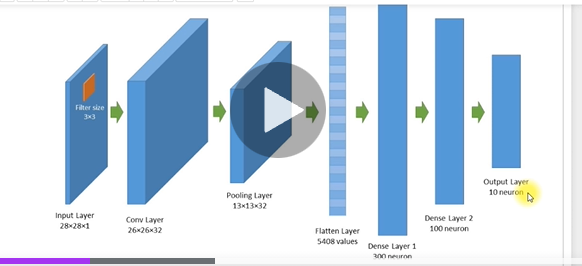

In [12]:
from IPython.display import Image
Image(filename ="model_archi.png", width=1000, height=1000)

In [14]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2)) # receptive field of 2 cross 2 for pooling layers

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))                                                     
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

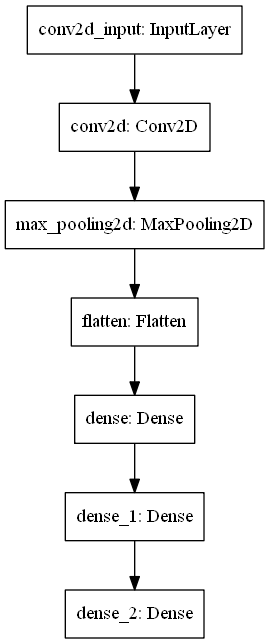

In [16]:
import pydot
keras.utils.plot_model(model)

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer= 'sgd',
             metrics=['accuracy'])

In [21]:
model_history=model.fit(X_train, y_train, epochs=30, batch_size=64,
                       validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 21s 23ms/step - loss: 0.8767 - accuracy: 0.6992 - val_loss: 0.7489 - val_accuracy: 0.7368
Epoch 2/30
860/860 [==============================] - 21s 24ms/step - loss: 0.5386 - accuracy: 0.8051 - val_loss: 0.4915 - val_accuracy: 0.8186
Epoch 3/30
860/860 [==============================] - 22s 25ms/step - loss: 0.4805 - accuracy: 0.8259 - val_loss: 0.9241 - val_accuracy: 0.7080
Epoch 4/30
860/860 [==============================] - 21s 25ms/step - loss: 0.4432 - accuracy: 0.8421 - val_loss: 0.4148 - val_accuracy: 0.8562
Epoch 5/30
860/860 [==============================] - 21s 24ms/step - loss: 0.4192 - accuracy: 0.8504 - val_loss: 0.4368 - val_accuracy: 0.8466
Epoch 6/30
860/860 [==============================] - 21s 24ms/step - loss: 0.3953 - accuracy: 0.8587 - val_loss: 0.3770 - val_accuracy: 0.8698
Epoch 7/30
860/860 [==============================] - 22s 25ms/step - loss: 0.3776 - accuracy: 0.8656 - val_loss: 0.4044 - val_accuracy:

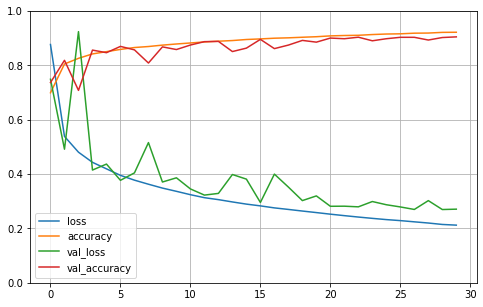

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)          # val_loss: validation loss
plt.show()                       # val_accuracy: validation accurary

In [23]:
ev=model.evaluate(X_test_n,y_test) # [loss  , accuracy]

313/313 [==============================] - 2s 5ms/step - loss: 0.2821 - accuracy: 0.8997


In [24]:
ev

[0.2820536494255066, 0.8996999859809875]

In [25]:
X_new=X_test[:3]

In [26]:
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred=np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

AxesImage(54,36;334.8x217.44)


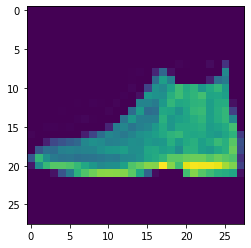

In [29]:
print(plt.imshow(X_test[0])) # bonne prediction

In [30]:
model.save("CNN1_Model.h5")

### Pooling vs No pooling layer

In [36]:
model_pool=keras.models.Sequential()
model_pool.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model_pool.add(keras.layers.MaxPooling2D(2,2))
model_pool.add(keras.layers.Flatten())
model_pool.add(keras.layers.Dense(300, activation="relu"))
model_pool.add(keras.layers.Dense(100, activation="relu"))                                                     
model_pool.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
model_pool.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

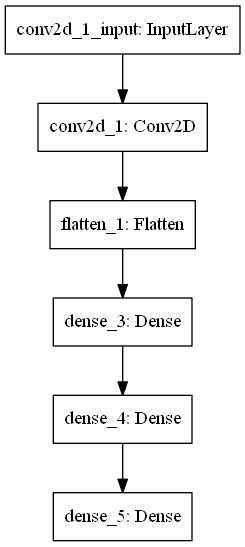

In [38]:
import pydot
keras.utils.plot_model(model_no_pool)

In [31]:
model_no_pool=keras.models.Sequential()
model_no_pool.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))

model_no_pool.add(keras.layers.Flatten())
model_no_pool.add(keras.layers.Dense(300, activation="relu"))
model_no_pool.add(keras.layers.Dense(100, activation="relu"))                                                     
model_no_pool.add(keras.layers.Dense(10, activation="softmax"))

In [33]:
model_no_pool.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


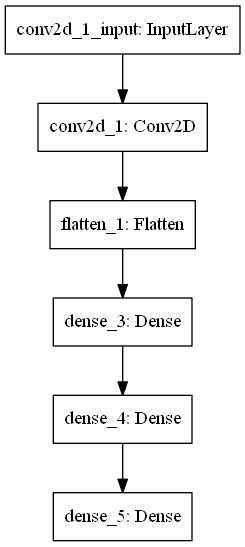

In [34]:
import pydot
keras.utils.plot_model(model_no_pool)

In [39]:
model_pool.compile(loss='sparse_categorical_crossentropy',
             optimizer= 'sgd',
             metrics=['accuracy'])

In [40]:
model_no_pool.compile(loss='sparse_categorical_crossentropy',
             optimizer= 'sgd',
             metrics=['accuracy'])

In [45]:
model_history_pool=model_pool.fit(X_train, y_train, epochs=3, batch_size=64,
                       validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 21s 24ms/step - loss: 0.7535 - accuracy: 0.7415 - val_loss: 0.7416 - val_accuracy: 0.7300
Epoch 2/3
860/860 [==============================] - 20s 23ms/step - loss: 0.5285 - accuracy: 0.8093 - val_loss: 0.4837 - val_accuracy: 0.8242
Epoch 3/3
860/860 [==============================] - 20s 23ms/step - loss: 0.4718 - accuracy: 0.8307 - val_loss: 0.9248 - val_accuracy: 0.7018


In [46]:
model_history_no_pool=model_no_pool.fit(X_train, y_train, epochs=3, batch_size=64,
                       validation_data=(X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 38s 44ms/step - loss: 0.7182 - accuracy: 0.7505 - val_loss: 0.6944 - val_accuracy: 0.7440
Epoch 2/3
860/860 [==============================] - 38s 45ms/step - loss: 0.4895 - accuracy: 0.8230 - val_loss: 0.4699 - val_accuracy: 0.8194
Epoch 3/3
860/860 [==============================] - 38s 45ms/step - loss: 0.4380 - accuracy: 0.8397 - val_loss: 0.8784 - val_accuracy: 0.7086


#### No pooling takes more time than pooling